In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv(r"D:\Script\From_RAJ\Code\PrecipData.csv")

In [4]:
df

,date,"('88.625', '26.625')","('88.625', '26.875')","('88.625', '27.125')","('88.625', '27.375')","('88.875', '26.125')","('88.875', '26.375')","('88.875', '26.625')","('88.875', '26.875')","('88.875', '27.125')",...,"('89.375', '25.875')","('89.375', '26.125')","('89.375', '26.375')","('89.375', '26.625')","('89.375', '26.875')","('89.625', '25.875')","('89.625', '26.125')","('89.875', '25.875')",model,projection
0,1951-01-01,1.39,1.88,2.23,3.13,0.0,0.34,0.8,1.31,0.0,...,0.0,0.0,0.0,0.14,0.0,0.0,0.0,0.0,ACCESS-CM2,historical
1,1951-01-02,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,ACCESS-CM2,historical
2,1951-01-03,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,ACCESS-CM2,historical
3,1951-01-04,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,ACCESS-CM2,historical
4,1951-01-05,0.17,0.61,1.32,2.60,0.0,0.00,0.0,0.30,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,ACCESS-CM2,historical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120221,2100-12-27,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NorESM2-MM,ssp585
1120222,2100-12-28,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NorESM2-MM,ssp585
1120223,2100-12-29,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NorESM2-MM,ssp585
1120224,2100-12-30,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NorESM2-MM,ssp585


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [7]:
ts_conditions = [
                (df['date'].dt.year > 1984) & (df['date'].dt.year <= 2014),
                (df['date'].dt.year > 2014) & (df['date'].dt.year <= 2044),
                (df['date'].dt.year > 2044) & (df['date'].dt.year <= 2074),
                 df['date'].dt.year > 2074
                ]

ts_choices = ['Base', 'Short', 'Mid', 'Long']

season_conditions = [
                     (df['date'].dt.month > 2) & (df['date'].dt.month <= 5),
                     (df['date'].dt.month > 5) & (df['date'].dt.month <= 9),
                     (df['date'].dt.month > 9) & (df['date'].dt.month <= 11),
                     (df['date'].dt.month.isin([1, 2, 12]))
                    ]

season_choices = ['Pre-Monsoon', 'Monsoon', 'Post-Monsoon', 'Winter']

df['time_span'] = np.select(ts_conditions, ts_choices, default='historical')
df['Season'] = np.select(season_conditions, season_choices, default='None')
df['Spatial_Mean']= df[df.columns[1:-8]].mean(axis=1)
spatial_mean_df = df[['time_span', 'model', 'projection', 'Season', 'Year', 'Month', 'Day', 'date', 'Spatial_Mean']]
spatial_mean_df

,time_span,model,projection,Season,Year,Month,Day,date,Spatial_Mean
0,historical,ACCESS-CM2,historical,Winter,1951,1,1,1951-01-01,0.483750
1,historical,ACCESS-CM2,historical,Winter,1951,1,2,1951-01-02,0.000000
2,historical,ACCESS-CM2,historical,Winter,1951,1,3,1951-01-03,0.000000
3,historical,ACCESS-CM2,historical,Winter,1951,1,4,1951-01-04,0.000000
4,historical,ACCESS-CM2,historical,Winter,1951,1,5,1951-01-05,0.208333
...,...,...,...,...,...,...,...,...,...
1120221,Long,NorESM2-MM,ssp585,Winter,2100,12,27,2100-12-27,0.000000
1120222,Long,NorESM2-MM,ssp585,Winter,2100,12,28,2100-12-28,0.000000
1120223,Long,NorESM2-MM,ssp585,Winter,2100,12,29,2100-12-29,0.000000
1120224,Long,NorESM2-MM,ssp585,Winter,2100,12,30,2100-12-30,0.000000


In [9]:
annual_avg_df = spatial_mean_df.groupby(['model', 'projection', 'Year'])['Spatial_Mean'].sum().reset_index()
annual_avg_df

,model,projection,Year,Spatial_Mean
0,ACCESS-CM2,historical,1951,2237.344167
1,ACCESS-CM2,historical,1952,3046.880833
2,ACCESS-CM2,historical,1953,2026.209167
3,ACCESS-CM2,historical,1954,2959.640417
4,ACCESS-CM2,historical,1955,3639.682500
...,...,...,...,...
3063,NorESM2-MM,ssp585,2096,3347.573333
3064,NorESM2-MM,ssp585,2097,3131.263333
3065,NorESM2-MM,ssp585,2098,2666.078750
3066,NorESM2-MM,ssp585,2099,2917.579583


In [12]:
annual_avg_df['Spatial_Mean'].max()

8488.509583333333

In [18]:
annual_avg_df['Spatial_Mean'].min()

1284.9008333333334

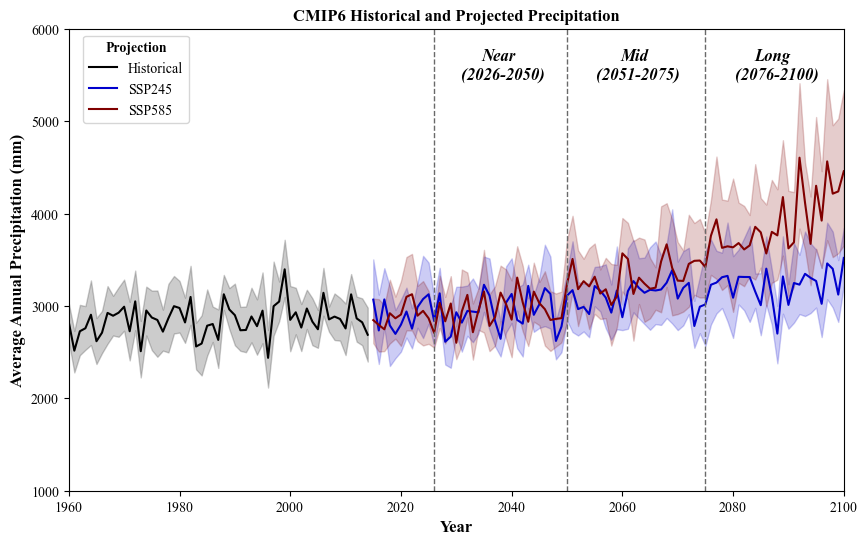

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
font = {'family' : 'Times New Roman',              
        'weight' : 'normal',  
        'size'   : 10}

plt.rc('font',**font)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

custom_palette = ["black", "mediumblue", "maroon"]

sns.lineplot(data=annual_avg_df, x='Year', y='Spatial_Mean', hue='projection', 
             errorbar=('ci', 95), palette = custom_palette, ax = ax)

# Customize plot
ax.set_xlim(1960, 2100)
ax.set_ylim(1000, 6000)
ax.set_title('CMIP6 Historical and Projected Precipitation', fontsize=12, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Annual Precipitation (mm)',  fontsize=12, fontweight='bold')

ax.axvline(2026, color='black', linewidth=1, linestyle='--', c='dimgrey')
ax.axvline(2050, color='black', linewidth=1, linestyle='--', c='dimgrey')
ax.axvline(2075, color='black', linewidth=1, linestyle='--', c='dimgrey')

# Shade regions between vertical lines
# ax.axvspan(2025, 2050, color='grey', alpha=0.05, label='Near-term')
# ax.axvspan(2050, 2075, color='grey', alpha=0.10, label='Mid-term')
# ax.axvspan(2075, 2100, color='grey', alpha=0.15, label='long-term')

ax.text(2038, 0.92, 'Near \n (2026-2050)', ha='center', va='center', transform=ax.get_xaxis_transform(), 
        fontweight='bold', fontstyle='italic', fontsize=12)
ax.text(2062.5, 0.92, 'Mid \n (2051-2075)', ha='center', va='center', transform=ax.get_xaxis_transform(), 
        fontweight='bold', fontstyle='italic', fontsize=12)
ax.text(2087.5, 0.92, 'Long \n (2076-2100)', ha='center', va='center', transform=ax.get_xaxis_transform(), 
        fontweight='bold', fontstyle='italic', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, ['Historical', 'SSP245', 'SSP585'], title='Projection', 
                   loc='upper left', bbox_to_anchor=(0.01, 1))
# legend.get_title().set_fontsize(10)
legend.get_title().set_fontweight('bold')
legend.get_title().set_horizontalalignment('left')
plt.savefig(r'D:\Script\From_RAJ\Output\Annual_Precipitation_Trend_Analysis.jpg', 
            dpi=600, bbox_inches = 'tight')
plt.show()